In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<Axes: >

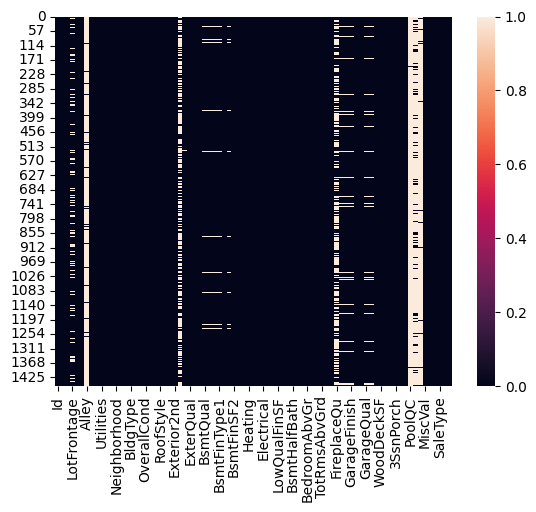

In [5]:
#heatmap showing the null values of the features
sns.heatmap(train_df.isnull())

In [6]:
#dropping columns which have too many NaN values
train_df = train_df.drop(columns = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [7]:
#dropping Id because of distinct values
train_df = train_df.drop(columns = ['Id'])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [9]:
def fillmean(columnfloat, df):
    for col in columnfloat:
        df[col] = df[col].fillna(train_df[col].mean())

In [10]:
def fillmode(columnobj, df):
    for col in columnobj:
        df[col] = df[col].fillna(train_df[col].mode()[0])

In [11]:
columns_with_null = train_df.columns[train_df.isnull().any()].tolist()
float_columns = [col for col in columns_with_null if train_df[col].dtype == 'float64']
fillmean(float_columns, train_df)
object_columns = [col for col in columns_with_null if train_df[col].dtype == 'object']
fillmode(object_columns, train_df)

<Axes: >

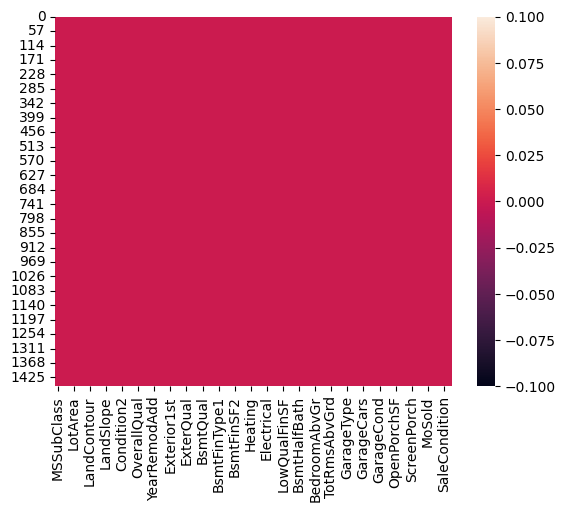

In [12]:
sns.heatmap(train_df.isnull())

In [13]:
#feature engineering for test data
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<Axes: >

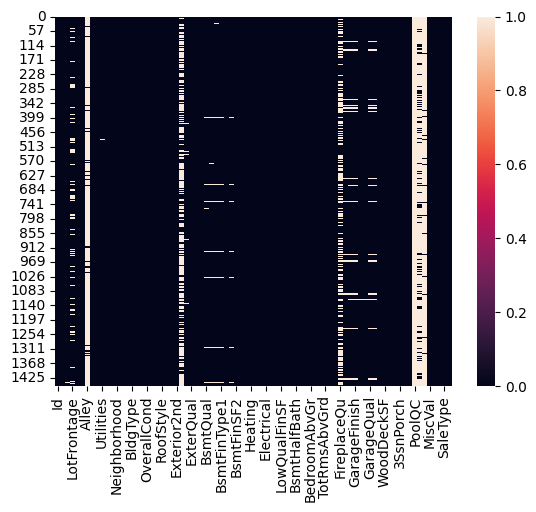

In [14]:
sns.heatmap(test_df.isnull())

In [15]:
test_df = test_df.drop(columns = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
# dropping Id as it contians distinct values
test_id = test_df['Id']
test_df = test_df.drop(columns = ['Id']).copy()

In [16]:
columns_with_null_test = test_df.columns[test_df.isnull().any()].tolist()
float_columns_test = [col for col in columns_with_null_test if test_df[col].dtype == 'float64']
fillmean(float_columns_test, test_df)
object_columns_test = [col for col in columns_with_null_test if test_df[col].dtype == 'object']
fillmode(object_columns_test, test_df)

<Axes: >

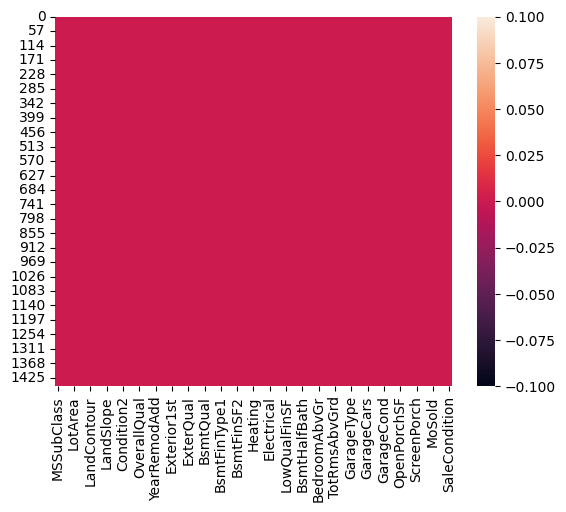

In [17]:
sns.heatmap(test_df.isnull())

In [18]:
#Handling categorical data:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#concatenating train and test dataframes
tot_df = pd.concat([train_df, test_df], axis = 0)
def categorical_labels(categorical_columns, df):
    #'categorical_columns' is a list of categorical column names
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])
categorical_columns = [col for col in tot_df.columns if tot_df[col].dtype == 'object']

categorical_labels(categorical_columns, tot_df)


In [19]:
train_df, test_df = tot_df[:1460], tot_df[1460:]

In [20]:
test_df = test_df.drop('SalePrice', axis = 1)

In [54]:
Y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis = 1)

In [52]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [57]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators':n_estimators,
                      'max_depth': max_depth,
                      'learning_rate': learning_rate,
                      'min_child_weight':min_child_weight}

In [58]:
import xgboost
classifier = xgboost.XGBRegressor()

In [38]:
# from sklearn.model_selection import RandomizedSearchCV
# random_cv = RandomizedSearchCV(estimator = classifier, param_distributions = hyperparameter_grid, cv = 5, n_iter = 50, scoring = 'neg_mean_absolute_error', n_jobs = 4, verbose = 5, return_train_score = True, random_state = 42)
# # random_cv.fit(X_train, Y_train)

In [63]:
from sklearn import metrics

In [64]:
import xgboost
classifier = xgboost.XGBRegressor(objective = "reg:squarederror",base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None)
classifier.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
pred = classifier.predict(X_train)
rmse1 = metrics.r2_score(Y_train, pred)
print(f"RMSE for the training set:{rmse1} ")



RMSE for the training set:0.9916080963107743 


In [69]:
pred = classifier.predict(X_valid)
rmse2 = metrics.r2_score(Y_valid, pred)
print(f"RMSE for the validaion set:{rmse2} ")

RMSE for the validaion set:0.9081357391823575 


In [ ]:
Y_pred = classifier.predict(test_df)
Y_pred = pd.DataFrame(Y_pred)
test_id = pd.DataFrame(test_id)
datasets = pd.concat([test_id, Y_pred], axis = 1)
datasets.columns = ['Id', 'SalePrice']


In [ ]:
datasets[['Id', 'SalePrice']].to_csv('House_pricing.csv', index = False)